Met dit project willen wij de brandende vraag beantwoorden of Ajax inderdaad bestaat uit mooiweervoetballers. Hiervoor is gekeken naar de eredivisie uitslagen vanaf seizoen 2008-2009 tot 2018-2019. De data is afkomstig van www.koningvoetbal.nl. De weerdata is afkomstig van http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi 
Als afhankelijke variabelen gaan we kijken naar het resultaat (winst, gelijk, verlies), het aantal doelpunten voor/tegen en het doelsaldo. Als voorspellers gaan we kijken naar o.a. temperatuur, neerslag en zonuren. 

In [1]:
#importeren libraries

import numpy as np 
import pandas as pd
import scipy as sp
import datetime as dt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as plt
import seaborn as sns
%matplotlib inline 


In [5]:
# importeren dataset Ajax scores (lokaal opgesglagen). 
df = pd.read_excel("mooiweervoetballers koningvoetbal.xlsx", index_col=None, header=None)


In [6]:
# columnames toevoegen
df.columns = ["Speeldag","Datum","Teams","Uitslag"]


In [7]:
# structuur checken 1
df.head()


,Speeldag,Datum,Teams,Uitslag
0,Zo,2008-09-14,Ajax - Roda JC,1-0
1,Zo,2008-09-28,Ajax - Vitesse,3-0
2,Za,2008-10-18,Ajax - FC Groningen,1-0
3,Zo,2008-10-26,Ajax - NEC,2-0
4,Zo,2008-11-09,Ajax - Sparta Rotterdam,5-2


In [8]:
# structuur checken 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 4 columns):
Speeldag    340 non-null object
Datum       340 non-null datetime64[ns]
Teams       340 non-null object
Uitslag     340 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 10.7+ KB


In [9]:
# checken of er missings zijn 
df.sum().isna()

Speeldag    False
Teams       False
Uitslag     False
dtype: bool

In [10]:
df2 = pd.read_csv("mooiweervoetballersedit.csv")

In [11]:
#change columnnames

# columnames toevoegen
df2.columns = ["Datum","meantemp","mintemp","maxtemp","zonuur","neerslagduur","etmaalneers","bewolkgraad"]

In [12]:
df2

,Datum,meantemp,mintemp,maxtemp,zonuur,neerslagduur,etmaalneers,bewolkgraad
0,20080814,151,95,206,70,7,1,3.0
1,20080815,147,83,212,108,5,40,1.0
2,20080816,159,68,228,109,0,0,2.0
3,20080817,163,132,218,9,15,90,8.0
4,20080818,161,135,191,5,96,132,8.0
5,20080819,175,148,220,40,7,45,7.0
6,20080820,167,142,193,22,41,57,8.0
7,20080821,170,141,206,42,3,18,6.0
8,20080822,145,90,199,5,56,64,7.0
9,20080823,148,107,195,91,29,132,6.0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 8 columns):
Datum           3927 non-null int64
meantemp        3927 non-null int64
mintemp         3927 non-null int64
maxtemp         3927 non-null int64
zonuur          3927 non-null int64
neerslagduur    3927 non-null int64
etmaalneers     3927 non-null int64
bewolkgraad     3918 non-null float64
dtypes: float64(1), int64(7)
memory usage: 245.5 KB


In [14]:
#Datum int omzetten naar str

df2['Datum'] = df2['Datum'].apply(str)

In [15]:
#check
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 8 columns):
Datum           3927 non-null object
meantemp        3927 non-null int64
mintemp         3927 non-null int64
maxtemp         3927 non-null int64
zonuur          3927 non-null int64
neerslagduur    3927 non-null int64
etmaalneers     3927 non-null int64
bewolkgraad     3918 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 245.5+ KB


In [16]:
#datum column omzetten naar date-time voor matching

df2["Datum"] = pd.to_datetime(df2["Datum"], format='%Y%m%d')



In [17]:
# datetime conversion check: 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 8 columns):
Datum           3927 non-null datetime64[ns]
meantemp        3927 non-null int64
mintemp         3927 non-null int64
maxtemp         3927 non-null int64
zonuur          3927 non-null int64
neerslagduur    3927 non-null int64
etmaalneers     3927 non-null int64
bewolkgraad     3918 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 245.5 KB


In [18]:
#nieuwe check head 
df2.head()

,Datum,meantemp,mintemp,maxtemp,zonuur,neerslagduur,etmaalneers,bewolkgraad
0,2008-08-14,151,95,206,70,7,1,3.0
1,2008-08-15,147,83,212,108,5,40,1.0
2,2008-08-16,159,68,228,109,0,0,2.0
3,2008-08-17,163,132,218,9,15,90,8.0
4,2008-08-18,161,135,191,5,96,132,8.0


In [19]:
#merge the two datasets on date

df3 = pd.merge(df, df2, on='Datum', how='right')

In [20]:
df3 = df3.dropna()

In [21]:
#checken
df3.head(20)

,Speeldag,Datum,Teams,Uitslag,meantemp,mintemp,maxtemp,zonuur,neerslagduur,etmaalneers,bewolkgraad
0,Zo,2008-09-14,Ajax - Roda JC,1-0,119,64,174,106,0,0,1.0
1,Zo,2008-09-28,Ajax - Vitesse,3-0,110,37,186,81,7,2,4.0
2,Za,2008-10-18,Ajax - FC Groningen,1-0,102,42,143,45,0,0,6.0
3,Zo,2008-10-26,Ajax - NEC,2-0,119,104,130,0,94,99,8.0
4,Zo,2008-11-09,Ajax - Sparta Rotterdam,5-2,101,88,115,19,21,50,6.0
5,Zo,2008-11-16,Ajax - PSV,4-1,82,23,116,8,0,-1,6.0
6,Zo,2008-11-30,Ajax - FC Utrecht,1-1,5,-22,26,0,101,84,7.0
7,Vr,2008-12-12,Ajax - NAC Breda,3-0,16,-8,36,23,0,0,7.0
8,Zo,2008-12-28,Ajax - ADO Den Haag,3-0,-28,-51,-1,66,0,0,1.0
9,Za,2009-01-31,Ajax - SC Heerenveen,0-1,1,-26,32,80,0,0,1.0


In [22]:
#checken2
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 339
Data columns (total 11 columns):
Speeldag        339 non-null object
Datum           339 non-null datetime64[ns]
Teams           339 non-null object
Uitslag         339 non-null object
meantemp        339 non-null int64
mintemp         339 non-null int64
maxtemp         339 non-null int64
zonuur          339 non-null int64
neerslagduur    339 non-null int64
etmaalneers     339 non-null int64
bewolkgraad     339 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 31.8+ KB


In [23]:
#checken3
df3.shape

(339, 11)

In [24]:
#column uit-thuis aanmaken 

df3['uitthuis'] = np.where(df3.Teams.str.startswith('Ajax'), "Thuis","Uit")

#https://stackoverflow.com/questions/42225711/create-new-pandas-column-based-on-start-of-text-string-from-other-column


In [25]:
# check: 
df3.head(20)

,Speeldag,Datum,Teams,Uitslag,meantemp,mintemp,maxtemp,zonuur,neerslagduur,etmaalneers,bewolkgraad,uitthuis
0,Zo,2008-09-14,Ajax - Roda JC,1-0,119,64,174,106,0,0,1.0,Thuis
1,Zo,2008-09-28,Ajax - Vitesse,3-0,110,37,186,81,7,2,4.0,Thuis
2,Za,2008-10-18,Ajax - FC Groningen,1-0,102,42,143,45,0,0,6.0,Thuis
3,Zo,2008-10-26,Ajax - NEC,2-0,119,104,130,0,94,99,8.0,Thuis
4,Zo,2008-11-09,Ajax - Sparta Rotterdam,5-2,101,88,115,19,21,50,6.0,Thuis
5,Zo,2008-11-16,Ajax - PSV,4-1,82,23,116,8,0,-1,6.0,Thuis
6,Zo,2008-11-30,Ajax - FC Utrecht,1-1,5,-22,26,0,101,84,7.0,Thuis
7,Vr,2008-12-12,Ajax - NAC Breda,3-0,16,-8,36,23,0,0,7.0,Thuis
8,Zo,2008-12-28,Ajax - ADO Den Haag,3-0,-28,-51,-1,66,0,0,1.0,Thuis
9,Za,2009-01-31,Ajax - SC Heerenveen,0-1,1,-26,32,80,0,0,1.0,Thuis


In [26]:
#uit en thuis doelpunten splitsen 

df3[['thuisdoel','uitdoel']] = df3.Uitslag.str.split("-",expand=True)

In [27]:
#uit en thuisdoelpunten (niet per se van Ajax!) omzetten naar int

df3['thuisdoel'] = df3['thuisdoel'].astype(int)
df3['uitdoel'] = df3['uitdoel'].astype(int)



In [28]:
#Ajax doelsaldo per wedstrijd column aanmaken

x = df3['thuisdoel'] - df3['uitdoel']
y = df3['uitdoel'] - df3['thuisdoel']

df3['doelsaldoajax'] = np.where(df3['uitthuis']=='Thuis', x, y)

In [29]:
#Ajax punten per wedstrijd berekenen en column aanmaken 

def resultaat(doelsaldoajax):
    if doelsaldoajax > 0:
        punten = 3
    elif doelsaldoajax == 0:
        punten = 1
    else:
        punten = 0
    return punten 

df3["punten"] = df3.doelsaldoajax.apply(resultaat)

In [30]:
# columns meer leesbaar maken door te delen door 10

df3['meantemp'] = df3['meantemp']/10
df3['mintemp'] = df3['mintemp']/10
df3['maxtemp'] = df3['maxtemp']/10
df3['zonuur'] = df3['zonuur']/10

In [31]:
df3.head(10)

,Speeldag,Datum,Teams,Uitslag,meantemp,mintemp,maxtemp,zonuur,neerslagduur,etmaalneers,bewolkgraad,uitthuis,thuisdoel,uitdoel,doelsaldoajax,punten
0,Zo,2008-09-14,Ajax - Roda JC,1-0,11.9,6.4,17.4,10.6,0,0,1.0,Thuis,1,0,1,3
1,Zo,2008-09-28,Ajax - Vitesse,3-0,11.0,3.7,18.6,8.1,7,2,4.0,Thuis,3,0,3,3
2,Za,2008-10-18,Ajax - FC Groningen,1-0,10.2,4.2,14.3,4.5,0,0,6.0,Thuis,1,0,1,3
3,Zo,2008-10-26,Ajax - NEC,2-0,11.9,10.4,13.0,0.0,94,99,8.0,Thuis,2,0,2,3
4,Zo,2008-11-09,Ajax - Sparta Rotterdam,5-2,10.1,8.8,11.5,1.9,21,50,6.0,Thuis,5,2,3,3
5,Zo,2008-11-16,Ajax - PSV,4-1,8.2,2.3,11.6,0.8,0,-1,6.0,Thuis,4,1,3,3
6,Zo,2008-11-30,Ajax - FC Utrecht,1-1,0.5,-2.2,2.6,0.0,101,84,7.0,Thuis,1,1,0,1
7,Vr,2008-12-12,Ajax - NAC Breda,3-0,1.6,-0.8,3.6,2.3,0,0,7.0,Thuis,3,0,3,3
8,Zo,2008-12-28,Ajax - ADO Den Haag,3-0,-2.8,-5.1,-0.1,6.6,0,0,1.0,Thuis,3,0,3,3
9,Za,2009-01-31,Ajax - SC Heerenveen,0-1,0.1,-2.6,3.2,8.0,0,0,1.0,Thuis,0,1,-1,0


In [32]:
# maand uit Datum extraheren: 

#https://stackoverflow.com/questions/51102615/get-month-from-date-column

df3['Maand-str'] = df['Datum'].dt.strftime('%b')


In [33]:
# Kwartaal uit Datum extraheren 

df3['Kwartaal'] = df['Datum'].dt.to_period("q")

In [34]:
# Enkel het kwartaal (zonder jaar) uit kwartaal extraheren: 



In [35]:
df3.head()

,Speeldag,Datum,Teams,Uitslag,meantemp,mintemp,maxtemp,zonuur,neerslagduur,etmaalneers,bewolkgraad,uitthuis,thuisdoel,uitdoel,doelsaldoajax,punten,Maand-str,Kwartaal
0,Zo,2008-09-14,Ajax - Roda JC,1-0,11.9,6.4,17.4,10.6,0,0,1.0,Thuis,1,0,1,3,Sep,2008Q3
1,Zo,2008-09-28,Ajax - Vitesse,3-0,11.0,3.7,18.6,8.1,7,2,4.0,Thuis,3,0,3,3,Sep,2008Q3
2,Za,2008-10-18,Ajax - FC Groningen,1-0,10.2,4.2,14.3,4.5,0,0,6.0,Thuis,1,0,1,3,Oct,2008Q4
3,Zo,2008-10-26,Ajax - NEC,2-0,11.9,10.4,13.0,0.0,94,99,8.0,Thuis,2,0,2,3,Oct,2008Q4
4,Zo,2008-11-09,Ajax - Sparta Rotterdam,5-2,10.1,8.8,11.5,1.9,21,50,6.0,Thuis,5,2,3,3,Nov,2008Q4


In [36]:
#gemiddelde punten per maand uitrekenen

df3.groupby(df3['Datum'].dt.strftime('%B'))['punten'].mean().sort_values()

Datum
January      1.760000
October      2.108108
November     2.114286
August       2.138889
February     2.279070
September    2.303030
March        2.457143
April        2.488372
December     2.500000
May          2.611111
Name: punten, dtype: float64

In [37]:
#correlatietabel maken 

corr = df3.corr()
corr.style.background_gradient(cmap='PuBu')

,meantemp,mintemp,maxtemp,zonuur,neerslagduur,etmaalneers,bewolkgraad,thuisdoel,uitdoel,doelsaldoajax,punten
meantemp,1,0.935602,0.965343,0.227083,-0.0831496,0.0403652,-0.0504829,0.0368644,0.0670273,0.0167002,0.0142737
mintemp,0.935602,1,0.831191,0.00523455,0.0452639,0.136631,0.149979,0.0513801,0.0651519,-0.00346455,-0.000112595
maxtemp,0.965343,0.831191,1,0.401356,-0.185486,-0.0423328,-0.213435,0.0327635,0.0539607,0.0330526,0.0169492
zonuur,0.227083,0.00523455,0.401356,1,-0.490032,-0.383954,-0.79418,0.0209699,-0.0352745,0.0188429,0.0107855
neerslagduur,-0.0831496,0.0452639,-0.185486,-0.490032,1,0.824884,0.420881,0.0448683,-0.0294604,-0.0183335,-0.0349028
etmaalneers,0.0403652,0.136631,-0.0423328,-0.383954,0.824884,1,0.335948,0.0691837,0.0124847,0.084964,0.038971
bewolkgraad,-0.0504829,0.149979,-0.213435,-0.79418,0.420881,0.335948,1,0.00684469,0.0724481,0.0253288,0.0384253
thuisdoel,0.0368644,0.0513801,0.0327635,0.0209699,0.0448683,0.0691837,0.00684469,1,-0.311458,0.369554,0.140994
uitdoel,0.0670273,0.0651519,0.0539607,-0.0352745,-0.0294604,0.0124847,0.0724481,-0.311458,1,0.155999,0.105581
doelsaldoajax,0.0167002,-0.00346455,0.0330526,0.0188429,-0.0183335,0.084964,0.0253288,0.369554,0.155999,1,0.791183


In [45]:
# Machine Learning based on regression

#voorspellers en afh. 
X = df3[['meantemp','mintemp','maxtemp','zonuur','neerslagduur','bewolkgraad']]
y = df3[['doelsaldoajax']]

#trainingset en testset aanmaken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#instance aanmaken 

lm = LinearRegression()

#model fitten

lm.fit(X_train,y_train)

print(lm.coef_)

[[-0.07870314 -0.01003282  0.08456135  0.06676562 -0.0038343   0.21331907]]


Text(0, 0.5, 'Predicted Y')

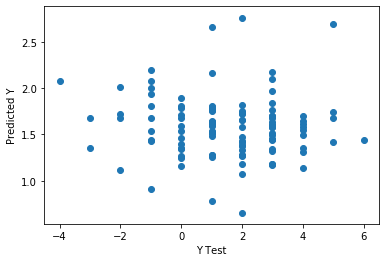

In [49]:
# checken of model op basis van trainingsdata voorspellend is

predictions = lm.predict(X_test)

plt.pyplot.scatter(y_test,predictions)
plt.pyplot.xlabel('Y Test')
plt.pyplot.ylabel('Predicted Y')

In [53]:
#get coefficients using statsmodels

X = df3[['meantemp','mintemp','maxtemp','zonuur','neerslagduur','bewolkgraad']]
Y = df3["doelsaldoajax"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          doelsaldoajax   R-squared (uncentered):                   0.429
Model:                            OLS   Adj. R-squared (uncentered):              0.419
Method:                 Least Squares   F-statistic:                              41.74
Date:                Tue, 24 Sep 2019   Prob (F-statistic):                    7.43e-38
Time:                        15:51:14   Log-Likelihood:                         -694.03
No. Observations:                 339   AIC:                                      1400.
Df Residuals:                     333   BIC:                                      1423.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
meantemp        -0.1028      0.178     -0.577      0.564      -0.453       0.248
mintemp         -0.0378      0.085     -0.443      0.658      -0.206       0.130
maxtemp          0.1279      0.107      1.192      0.234      -0.083       0.339
zonuur           0.0358      0.045      0.797      0.426      -0.052       0.124
neerslagduur     0.0001      0.004      0.028      0.977      -0.007       0.007
bewolkgraad      0.1603      0.036      4.507      0.000       0.090       0.230
==============================================================================
Omnibus:                        3.585   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.609
Skew:                           0.145   Prob(JB):                        0.165
Kurtosis:                       3.415   Cond. No.                         82.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

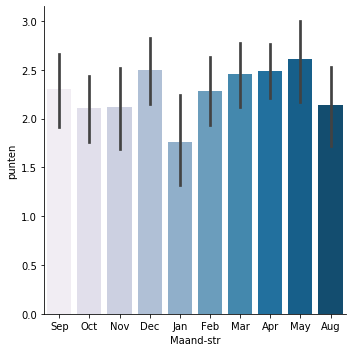

In [40]:
#punten per maand plotten 

sns.catplot(x="Maand-str", y="punten", kind="bar", data=df3, palette="PuBu")

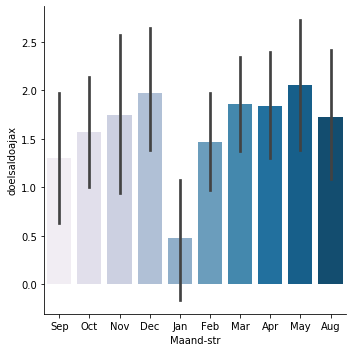

In [91]:
sns.catplot(x="Maand-str", y="doelsaldoajax", kind="bar", data=df3, palette="PuBu")

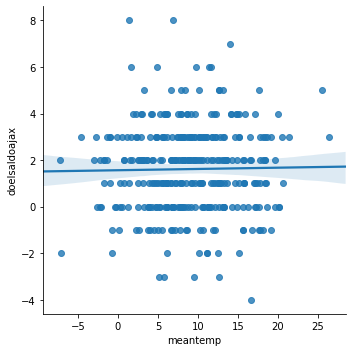

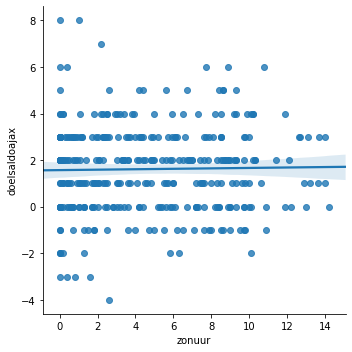

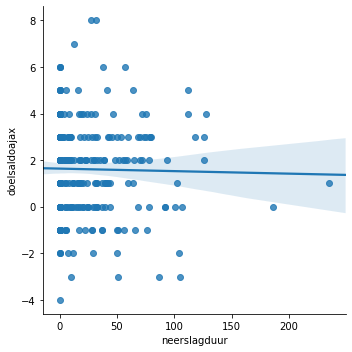

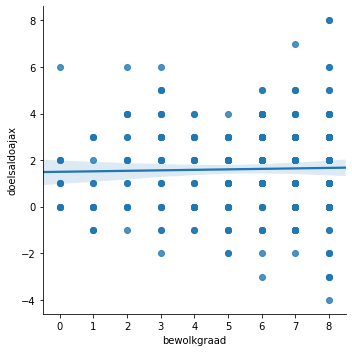

In [79]:
 #temp, zonuur, neerslag en bewolking als predictors 

sns.lmplot(x="meantemp", y="doelsaldoajax", data=df3)
sns.lmplot(x="zonuur", y="doelsaldoajax", data=df3)
sns.lmplot(x="neerslagduur", y="doelsaldoajax", data=df3)
sns.lmplot(x="bewolkgraad", y="doelsaldoajax", data=df3)